In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

Mounted at /content/drive


[[[5 5 5]
  [4 4 4]
  [5 5 5]
  ...
  [3 3 3]
  [4 4 4]
  [3 3 3]]

 [[5 5 5]
  [6 6 6]
  [5 5 5]
  ...
  [3 3 3]
  [3 3 3]
  [4 4 4]]

 [[4 4 4]
  [5 5 5]
  [6 6 6]
  ...
  [4 4 4]
  [4 4 4]
  [3 3 3]]

 ...

 [[4 4 4]
  [4 4 4]
  [5 5 5]
  ...
  [4 4 4]
  [5 5 5]
  [6 6 6]]

 [[5 5 5]
  [6 6 6]
  [7 7 7]
  ...
  [4 4 4]
  [5 5 5]
  [5 5 5]]

 [[4 4 4]
  [4 4 4]
  [5 5 5]
  ...
  [5 5 5]
  [4 4 4]
  [7 7 7]]]


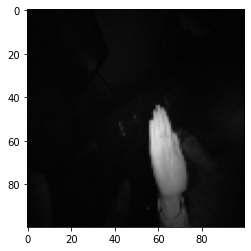

In [ ]:
datadir = "/content/drive/MyDrive/Handsign/Train"
categories=['01_palm','02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_COLOR)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 1000/1000 [00:12<00:00, 77.73it/s] 

10000


In [ ]:
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(8000, 100, 100, 1)

In [ ]:
y_train.shape

(8000,)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train/=255
x_test/=255

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train.shape

(8000, 10)

In [ ]:
model  = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                        

In [ ]:
from tensorflow.keras.optimizers import SGD
opt=SGD(lr=0.01,momentum=0.9)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=64,epochs=150,verbose=1, validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
125/125 [==============================] - 21s 65ms/step - loss: 1.4634 - accuracy: 0.4896 - val_loss: 0.2181 - val_accuracy: 0.9415
Epoch 2/150
125/125 [==============================] - 8s 61ms/step - loss: 0.2062 - accuracy: 0.9285 - val_loss: 0.0108 - val_accuracy: 0.9965
Epoch 3/150
125/125 [==============================] - 8s 62ms/step - loss: 0.0902 - accuracy: 0.9704 - val_loss: 0.0062 - val_accuracy: 0.9995
Epoch 4/150
125/125 [==============================] - 8s 63ms/step - loss: 0.0456 - accuracy: 0.9845 - val_loss: 0.0027 - val_accuracy: 0.9985
Epoch 5/150
125/125 [==============================] - 8s 63ms/step - loss: 0.0354 - accuracy: 0.9872 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 6/150
125/125 [==============================] - 8s 63ms/step - loss: 0.0282 - accuracy: 0.9901 - val_loss: 0.0033 - val_accuracy: 0.9990
Epoch 7/150
125/125 [==============================] - 8s 64ms/step - loss: 0.0291 - accuracy: 0.9902 - val_loss: 0.0022 - val_accuracy

In [ ]:
model.save('AI_Handsign.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'palm',1: 'l',2: 'fist',3:'fist_moved',4:'thumb',5:'index',6:'ok',7:'palm_moved',8:'c',9:'down'}
model = load_model('AI_Handsign.h5')

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation index


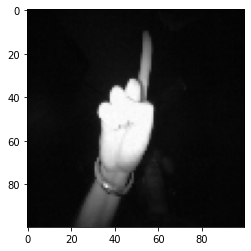

In [ ]:
img = load_image('/content/drive/MyDrive/Handsign/08/06_index/frame_08_06_0001.png')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
expectation c


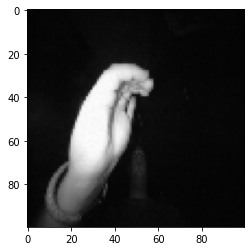

In [ ]:
img = load_image('/content/drive/MyDrive/Handsign/08/09_c/frame_08_09_0005.png')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
expectation down


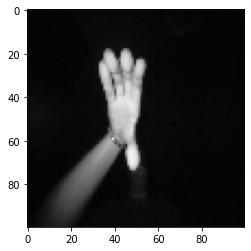

In [ ]:
img = load_image('/content/drive/MyDrive/Handsign/08/10_down/frame_08_10_0013.png')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])